## PARA RODAR ESSE NOTEBOOK:

É importante que a versão do Julia instalada seja a 1.6. Houveram mudanças significativas no código e algumas versões antigas já não possuem o suporte (e.g. a 1.3.)

ao chamar `julia` no terminal, digite `]` para abrir o gerenciador de pacotes. O único pacote utilizado aqui é o `Plots`. Para instalar:

```
>julia ]

(@v1.6) add Plots
```


Um oscilador harmônico simples consiste de uma massa $m$ e uma mola com constante elástica $k$. Em função do tempo $t$, ele se move em uma dimensão com posição $x(t)$ e velocidade $v(t)$ dadas por

$$\begin{equation*}
\begin{split}
x(t)&=A\cos(\omega t+\phi)\\
v(t)&=− \omega A \sin(\omega t+\phi)
\end{split}
\end{equation*}$$

com 
$$\begin{equation*}
\omega = \sqrt(k/m)
\end{equation*}$$

In [15]:
using Plots

defina funções para $x(t)$ e $v(t)$, tratando as constantes como variáveis ainda não atribuídas;

trace gráficos separados de $x(t)$ e $v(t)$, para $0 ≤ t ≤ 10 $, supondo $m=1.75kg$, $k=2N/m$,$A=5m$ e $ϕ=π/4$. 

In [16]:
function angular_frequency(k, m)
    return sqrt(k/m)
end 

function harmonic_oscilator_pos(t, ω, A, ϕ)
    return @. A .* ( cos.(ω .* t .+ ϕ))
end   

function harmonic_oscilator_vel(t, ω, A, ϕ)
    return @. - ω * A * sin(ω * t + ϕ)
end

function amplitude(x_inicial, v_inicial, ω)
    return sqrt(x_inicial^2 + (v_inicial^2 / ω^2))
end

function angular_phase(x_inicial, v_inicial, ω)
    return atan( - v_inicial / (ω * x_inicial))
end

angular_phase (generic function with 1 method)

In [17]:
k = 2 # N/m
A = 5 # m
ϕ = pi/4 
m = 1.75 # 1.75 Kg
t = 0:0.1:10 #s

0.0:0.1:10.0

In [18]:
ω = angular_frequency(k,m);
x = harmonic_oscilator_pos(t, ω, A, ϕ);
v = harmonic_oscilator_vel(t, ω, A, ϕ);

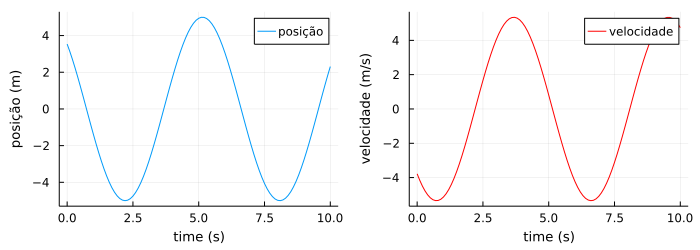

In [19]:
# plot_font = "Times New Roman"
# default(linewidth=1, label=nothing, grid=true)

gr(xtickfontsize=8, ytickfontsize=8, xguidefontsize=9, yguidefontsize=9, legendfontsize=8, dpi=100);

p1 = plot(t, x, label = "posição")
p1 = xlabel!("time (s)")
p1 = ylabel!("posição (m)")

p2 = plot(t, v, label = "velocidade", color = "red")
p2 = xlabel!("time (s)")
p2 = ylabel!("velocidade (m/s)")

plot(p1,p2, size = (700, 250),
                left_margin = 4Plots.mm,
                bottom_margin = 4Plots.mm)

# savefig("plot_1.png")


No instante inicial,$t=0$, a posição e a velocidade são dadas por $x0=x(0)=Acos\phi$ e $v0=v(0)=−\omega A \sin\phi$, de modo que

$$\begin{equation*}
\begin{split}
A = \sqrt(x^{2}_{0}+\frac{v^{2}_{0}}{\omega^{2}})\\
\phi =\arctg(-\frac{v_0}{\omega x_0})
\end{split}
\end{equation*}
$$ 


Em seu código, defina $A$ e $ϕ$ pelas equações acima. Trace os mesmos gráficos do item anterior, com os mesmos valores para $m$ e $k$, mas agora supondo $x0=0.25m$ e $v0=1.25m/s$.

In [20]:
x_inicial = 0.25 #m
v_inicial = 1.25 #m/s

ω = angular_frequency(k,m)
A = amplitude(x_inicial, v_inicial, ω)
ϕ = angular_phase(x_inicial, v_inicial, ω)

x = harmonic_oscilator_pos(t, ω, A, ϕ);
v = harmonic_oscilator_vel(t, ω, A, ϕ);

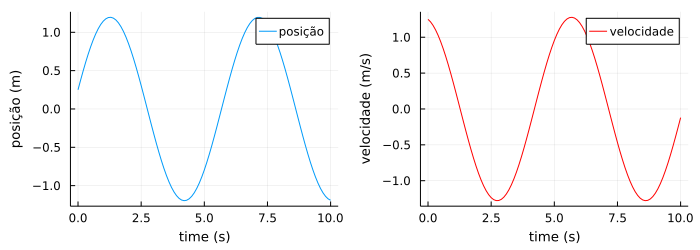

In [21]:
p1 = plot(t, x, label = "posição")
p1 = xlabel!("time (s)")
p1 = ylabel!("posição (m)")

p2 = plot(t, v, label = "velocidade", color = "red")
p2 = xlabel!("time (s)")
p2 = ylabel!("velocidade (m/s)")

plot(p1,p2, size = (700, 250),
                left_margin = 4Plots.mm,
                bottom_margin = 4Plots.mm)
# savefig("plot_2.png")


A energia cinética de uma massa $m$ com velocidade $v$ é $K=\frac{1}{2}m v^2 $. Para uma mola com deformação $x$ e constante elástica $k$, a energia potencial é $U=\frac{1}{2}kx^2$. Defina em seu código as funções $K(v)$ e $U(x)$ e trace gráficos dessas duas funções e de sua soma, todos em função do tempo e no mesmo conjunto de eixos, para $0≤t≤10s$ e utilizando os mesmos parâmetros do item anterior. (Certifique-se de que os 3 gráficos tenham cores distintas. Para conseguir isso, caso utilize o operador de substituição, pode ser necessário repetir a substituição para cada função na lista de gráficos que serve como primeiro argumento para a função Plot.)

In [22]:
function kinetic_energy(m,v)
return @. (1/2)* m * (v^2)
end

function potential_energy(k, x)
    return @. (1/2) * k * (x^2)
end;

In [23]:
K = kinetic_energy(m, v)
U = potential_energy(k, x)
E = K + U;

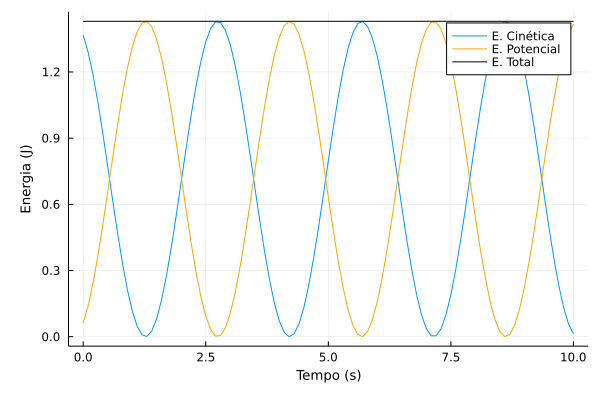

In [24]:
plot(t, K, label = "E. Cinética",xaxis = ("Tempo (s)"),
left_margin = 5Plots.mm,
bottom_margin = 4Plots.mm)
ylabel!("Energia (J)")
plot!(t, U, color = "orange", label = "E. Potencial")
plot!(t, E, color = "black", label = "E. Total")

# savefig("plot_3.png")